# **Trabalho 5 - Modelo PAR(p) Otimização**

Aluno $\hspace{0.3cm}$ : **João Vitor Assis**

Matrícula: 120100007

# 1) Importando os Dados do Newave:

## 1.1) Instalando a Biblioteca PySDDP, Versão 0.0.39

In [1]:
%pip install PySDDP==0.0.39

Note: you may need to restart the kernel to use updated packages.Collecting PySDDP==0.0.39
  Using cached PySDDP-0.0.39-py3-none-any.whl (191 kB)
  Attempting uninstall: PySDDP
    Found existing installation: PySDDP 0.0.35
    Uninstalling PySDDP-0.0.35:
      Successfully uninstalled PySDDP-0.0.35



## 1.2) Importando os dados da pasta do Computador

In [2]:
import os
import glob

caminho_da_pasta = 'G:\\Meu Drive\\NewaveJul2023' # Define o caminho para a pasta do Google Drive no computador.

arquivos_dat = glob.glob(os.path.join(caminho_da_pasta, '*.dat')) # Lista os arquivos na pasta com a extensão .dat usando a função glob

for arquivo in arquivos_dat: # Loop para ler cada arquivo .dat e imprimir seu conteúdo
    with open(arquivo, 'r') as f:
        #conteudo = f.read()
        print(arquivo)

G:\Meu Drive\NewaveJul2023\ree.dat
G:\Meu Drive\NewaveJul2023\arquivos.dat
G:\Meu Drive\NewaveJul2023\dger.dat
G:\Meu Drive\NewaveJul2023\modif.dat
G:\Meu Drive\NewaveJul2023\exph.dat
G:\Meu Drive\NewaveJul2023\sistema.dat
G:\Meu Drive\NewaveJul2023\CASO.DAT
G:\Meu Drive\NewaveJul2023\HIDR.DAT
G:\Meu Drive\NewaveJul2023\VAZOES.DAT
G:\Meu Drive\NewaveJul2023\confhd.dat


## 1.3) Importando bibliotecas Importantes

In [3]:
from PySDDP.Pen import Newave        # Importa a classe Newave do PySDDP.
import numpy as np                   # Importa a Biblioteca Numpy.
import plotly.graph_objects as go    # Importa a bilbioteca Plotly.
from matplotlib import pyplot as plt # Importa a biblioteca matplotlib.
from random import randint           # Importa a classe randint da biblioteca random.
import pandas as pd                  # Importa a biblioteca pandas.

## 1.4) Lendo o Caso do Newave

In [4]:
# Lendo o Caso para os dados do Newave de Julho de 2023.

Caminho = 'G:\\Meu Drive\\NewaveJul2023'
Caso = Newave(Caminho) #Cria objeto com caso Completo.

OK! Leitura do CASO.DAT realizada com sucesso.
OK! Leitura do arquivos.dat realizada com sucesso.
OK! Leitura do dger.dat realizada com sucesso.
OK! Leitura do HIDR.DAT realizada com sucesso.
OK! Leitura do VAZOES.DAT realizada com sucesso.
OK! Leitura do modif.dat realizada com sucesso. ( 99 Usinas Hidraulicas Modificadas )
OK! Leitura do exph.dat realizada com sucesso. ( 2 Usinas Hidraulicas Expandidas )
OK! Leitura do confhd.dat realizada com sucesso.
OK! Leitura do ree.dat realizada com sucesso. ( 12 Reservatórios Equivalentes de Energia Foram Lidos )
OK! Leitura do sistema.dat realizada com sucesso.


# 2) Escolha da Usina para o Estudo:

## 2.1) Usinas em operação para Estudo:

In [5]:
## Listagem das Usinas Hidrelétricas disponivéis para Estudo.

dados_UHE = []

for i in range(0, len(Caso.confhd._nome['valor'])):
    dados_UHE.append((Caso.confhd._nome['valor'][i]))


#Criando o dataFrame:
df_UHE = pd.DataFrame(dados_UHE, columns=['Nome da UHE'])


#Exibindo o dataFrame:
#df_UHE

#ajuste de visualização:
pd.set_option('display.max_rows', None)

#Exibindo o dataFrame:
df_UHE

,Nome da UHE
0,FUNIL-GRANDE
1,BATALHA
2,SERRA FACAO
3,CAPIM BRANC1
4,CAPIM BRANC2
5,CORUMBA IV
6,PIRAJU
7,ITAIPU
8,NILO PECANHA
9,FONTES


## 2.2) Escolha da UHE:

In [8]:
# Escolha da UHE para o Estudo:

print('Escolha a Forma de encontrar a UHE:')
print('1 - Número da Usina.')
print('2 - Nome da Usina.')

Escolha = int(input())

if Escolha==1 or Escolha==2:
    confirma = False
else:
    confirma = True

while confirma == False  and Escolha == 1:
    if Escolha == 1:
        print('\nDigite o Número da Usina para o Estudo: ')
        U = int(input())

        UHE_Estudo = None

        for i in range(0, len(Caso.confhd._nome['valor'])):
            if i == U:
                UHE_Estudo = Caso.confhd._nome['valor'][i]
                print(UHE_Estudo)
        print('\nDeseja confirma a UHE? Y/N')
        confirma = input()
        if confirma == 'Y' or confirma == 'y':     
            print('\nUHE Escolhida  : ', UHE_Estudo) 
            print('Número da Usina: ', U)
            confirma = True
            Escolha = 0
        else:
            confirma = False
            Escolha == 1
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
while confirma == False and Escolha == 2:           
    if Escolha == 2:
        print('\nDigite o Nome da Usina para o Estudo: ')
        UHE_Estudo = input()

        U = 0
        iter = 0
        for i in range(0, len(Caso.confhd._nome['valor'])):
            UHE_Caso = Caso.confhd._nome['valor'][i].strip("'").replace("'","") #Tira as '' do Nome da Usina.
            UHE_Caso = Caso.confhd._nome['valor'][i].lower()                    #Deixa o Nome da usina do caso em letras mínusculas.
            UHE_Caso = "".join(UHE_Caso.split())                                #Tira os espaços do Nome da Usina do Caso.

            UHE_Estudo = UHE_Estudo.lower()                                     #Deixa o Nome da usina Estudada em letras mínusculas.
            UHE_Estudo = "".join(UHE_Estudo.split())                            #Tira os espaços do Nome da Usina do Caso.
            iter += 1 
            #Comparando as Strings para achar a usina nos Dados do Newave.
            if UHE_Caso == UHE_Estudo:
                U = i
                UHE_Estudo1 = Caso.confhd._nome['valor'][U]  
                print(UHE_Estudo1)
                print('Deseja confirma a UHE? Y/N')
                confirma = input()
            
            #if UHE_Caso != UHE_Estudo and iter == len(Caso.confhd._nome['valor'])-1:
                #print('Não há nenhuma UHE com o Nome informado. Tente Novamente.') 
                #break
 
        if confirma == 'Y' or confirma == 'y':
            print('\nUHE Escolhida  : ', UHE_Estudo1) 
            print('Número da Usina: ', U)
            confirma = True
            Escolha = 0
        else:
            confirma = False
            Escolha == 2 
         
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if confirma == True and Escolha!=1 and Escolha!=2 and Escolha !=0: 
    print('Opção Inválida. Tente Novamente.')
    
    
UHE_Estudo = Caso.confhd._nome['valor'][U] 
#print('\nUHE Escolhida: ', UHE_Estudo) 
#print('Número da Usina: ', U)


Escolha a Forma de encontrar a UHE:
1 - Número da Usina.
2 - Nome da Usina.

Digite o Nome da Usina para o Estudo: 
FURNAS      
Deseja confirma a UHE? Y/N

UHE Escolhida  :  FURNAS      
Número da Usina:  71


## 2.3) Dados de Vazão Natual Afluente($Z_{t}$) da Usina Escolhida:

In [9]:
Usina = Caso.confhd.get(UHE_Estudo1)
print('UHE: ',Usina['nome'])
Vazoes = Usina['vazoes']
print("\nDimensão Vazões: ",np.shape(Vazoes))

df =pd.DataFrame(Vazoes) #Cria um dataFrame com os Dados de Vazão

df #Mostra a matriz de Vazoes com o Pandas.

#print(df)

UHE:  FURNAS      

Dimensão Vazões:  (93, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,1476,2964,2167,1585,1254,785,607,469,538,662,667,1127
1,1908,1898,1534,868,673,632,473,393,388,521,573,1474
2,1330,726,696,610,441,356,329,325,295,411,295,692
3,1210,699,752,480,333,276,240,204,247,272,320,1285
4,1846,2584,1547,1334,909,674,554,468,436,619,527,661
5,594,662,1812,942,626,436,365,352,445,351,601,1302
6,2600,1589,1112,832,836,620,456,364,307,819,997,2343
7,1899,1646,1445,952,850,637,508,481,481,793,914,1647
8,2089,1999,1063,957,728,559,483,398,351,398,606,1356
9,2018,2425,2077,1144,824,637,513,408,382,464,1043,1554


# 3) Plotagem de todas as Séries Históricas de Vazão da UHE em Estudo:

* Em vermelho $\hspace{0.2cm}$-> Média Histórica mensal ou MLT(Média de Longo Termo).
* Em pontilhado -> Média mensal +/- o desvio padrão mensal.
* Em azul $\hspace{0.9cm}$-> Dados de Vazão do Ano corrente(Julho de 2023).

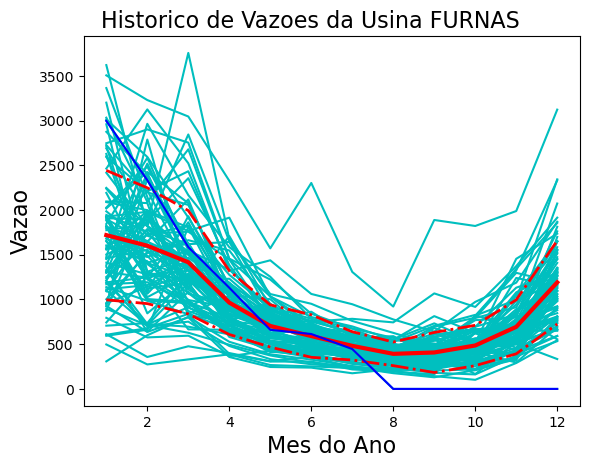

In [10]:
Caso.confhd.plot_vaz(Usina)

# 4) Otimização dos Coeficientes $\phi_{t}$ do Modelo AR:

## 4.1) Modelo de Otimização:

$ Min \hspace{0.5cm}  \epsilon_{Ago,1931}^{2} + \epsilon_{Ago,1932}^{2} + .... + \epsilon_{Ago,2021}^{2} + \epsilon_{Ago,2022}^{2}$

**Sujeito a:**

* $Z_{Ago,1931} = \phi_{1} ⋅ Z_{Jul,1931} + \phi_{2} ⋅ Z_{Jun,1931} +\phi_{3} ⋅ Z_{Mai,1931} + \epsilon_{Ago,1931} $

* $Z_{Ago,1932} = \phi_{1} ⋅ Z_{Jul,1932} + \phi_{2} ⋅ Z_{Jun,1932} +\phi_{3} ⋅ Z_{Mai,1932} + \epsilon_{Ago,1932} $

* $           .           .     \hspace{1cm}           .           .     \hspace{1cm}           .           .     \hspace{1cm}           .           .     $

* $           .           .     \hspace{1cm}           .           .     \hspace{1cm}           .           .     \hspace{1cm}           .           .     $

* $Z_{Ago,2022} = \phi_{1} ⋅ Z_{Jul,2022} + \phi_{2} ⋅ Z_{Jun,2022} +\phi_{3} ⋅ Z_{Mai,2022} + \epsilon_{Ago,2022} $

* $Z_{Ago,2023} = \phi_{1} ⋅ Z_{Jul,2023} + \phi_{2} ⋅ Z_{Jun,2023} +\phi_{3} ⋅ Z_{Mai,2023} + \epsilon_{Ago,2023} $

## 4.2 ) Modelo de Otimização da Forma Matricial:

$ Min \hspace{0.5cm}  q^{T} ⋅  X + \frac{1}{2} ⋅  X^{T} ⋅  P ⋅  X$

**Sujeito á:**

* $ Aeq = X ⋅ Beq$

**Onde:**

* $ q^{T} = [0\hspace{0.3cm}0\hspace{0.3cm}0\hspace{0.3cm}0\hspace{0.3cm}...\hspace{0.3cm}0\hspace{0.3cm}0\hspace{0.3cm}0]$

* $X^{T} = [\phi_{1}\hspace{0.3cm}\phi_{2}\hspace{0.3cm}\phi_{3}\hspace{0.3cm}\epsilon_{Ago,1931}\hspace{0.3cm}...\hspace{0.3cm}\epsilon_{Ago,2022}]$

* $P =            [0\hspace{0.3cm}0\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}0\hspace{0.3cm}]  $

  $\hspace{0.76cm}[0\hspace{0.3cm}0\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}0\hspace{0.3cm}] $

  $\hspace{0.76cm}[0\hspace{0.3cm}0\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}0\hspace{0.3cm}] $

  $\hspace{0.76cm}[0\hspace{0.3cm}0\hspace{0.3cm}0...\hspace{0.3cm}2...\hspace{0.3cm}0...\hspace{0.3cm}0\hspace{0.3cm}] $

  $\hspace{0.76cm}[.\hspace{0.4cm}.\hspace{0.4cm}....\hspace{0.4cm}....\hspace{0.4cm}....\hspace{0.4cm}.\hspace{0.3cm}] $

  $\hspace{0.76cm}[0\hspace{0.3cm}0\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}2...\hspace{0.3cm}0\hspace{0.3cm}] $
    
  $\hspace{0.76cm}[0\hspace{0.3cm}0\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}0...\hspace{0.3cm}2\hspace{0.3cm}] $


* $Aeq =          [Z_{Jul,1931}\hspace{0.3cm}Z_{Jun,1931}\hspace{0.3cm}Z_{Mai,1931}|\hspace{0.3cm}1\hspace{0.3cm}0\hspace{0.3cm}...\hspace{0.3cm}0] $

  $\hspace{1.05cm}[Z_{Jul,1932}\hspace{0.3cm}Z_{Jun,1932}\hspace{0.3cm}Z_{Mai,1932}|\hspace{0.3cm}0\hspace{0.3cm}1\hspace{0.3cm}...\hspace{0.3cm}0] $

  $\hspace{1.05cm}[\hspace{0.5cm}..\hspace{1.5cm}..\hspace{1.2cm}..\hspace{0.6cm}  |\hspace{0.2cm}..\hspace{0.4cm}..\hspace{0.27cm}...\hspace{0.25cm}..] $

  $\hspace{1.05cm}[Z_{Jul,2021}\hspace{0.3cm}Z_{Jun,2021}\hspace{0.3cm}Z_{Mai,2021}|\hspace{0.3cm}0\hspace{0.3cm}0\hspace{0.3cm}...\hspace{0.3cm}0] $
  
  $\hspace{1.05cm}[Z_{Jul,2022}\hspace{0.3cm}Z_{Jul,2022}\hspace{0.3cm}Z_{Mai,2022}|\hspace{0.3cm}0\hspace{0.3cm}0\hspace{0.3cm}...\hspace{0.3cm}1] $

* $Beq^{T} =      [Z_{Ago,1931}\hspace{0.3cm}Z_{Ago,1932}\hspace{0.3cm}....\hspace{0.3cm}Z_{Ago,2021}\hspace{0.3cm}Z_{Ago,2022}]$

In [11]:
from cvxopt import matrix, solvers
import numpy as np

Total_anos = (np.shape(Usina['vazoes'])[0])-2 #91 Anos (tira 2022 e 2023 - Dados de Vazão anual)
#print(Total_anos)
Ano_Corrente = 2023
Anos_Analise = (Ano_Corrente - 1931) - 1 #(exceto o ano de 1931).
#print(Anos_Analise)
Mes_Analise = 3 #Julho, Junho e Maio.
phis = 8        #Phi1,   Phi2 e Phi3.

#dicionário de Meses:
Mes = { 0 : 'jan',
        1 : 'fev',
        2 : 'mar',
        3 : 'abr',
        4 : 'mai',
        5 : 'jun',
        6 : 'jul',
        7 : 'ago',
        8 : 'set',
        9 : 'out',
        10: 'nov',
        11: 'dez'
    }

mes = Mes[7] #Escolha do Mês de Estudo.
#print(mes)

#---------------------------------------------------------------------------------------------------------------------------

def recorte(mes, n):
    Num_Mes = None
    for k,v in Mes.items():#Encontra o nº de meses usando o dicionário  Mes.
        if v == mes:
            Num_Mes = k;
            #print(k)
            #print(Num_Mes)
            break
    if n == 'Aeq':
        if (Num_Mes - phis) >= 0:
            Inicio_L = Total_anos - Anos_Analise #Nº Anos - (2023-1931)
            Fim_L    = Total_anos                #Nº de anos(91)

            Inicio_C = Num_Mes - phis #Nº mes - 3Phis
            Fim_C    = Num_Mes        #Nº mes
            recorte  = Usina['vazoes'][Inicio_L:Fim_L, Inicio_C:Fim_C]
        else:
            recorte_ano_atual=  Usina['vazoes'][0:Total_anos, 0:Num_Mes]
            shape_ano_atual = np.shape(recorte_ano_atual)
            recorte_ano_atual = recorte_ano_atual[:, ::-1]           # Para espelhar a matriz e ficar com os dados de trás para frente

            recorte_ano_anterior =  Usina['vazoes'][0:Total_anos, (Num_Mes-phis):]
            shape_ano_anterior = np.shape(recorte_ano_anterior)
            recorte_ano_anterior = recorte_ano_anterior[:, ::-1]     # Para espelhar a matriz e ficar com os dados de trás para frente

            # recorte = matrix(np.concatenate((recorte_ano_atual, recorte_ano_anterior), axis=1))
            # return recorte
            
            if shape_ano_atual[0] == shape_ano_anterior[0]:
                recorte = matrix(np.concatenate((recorte_ano_atual, recorte_ano_anterior), axis=1))
            else:
                print("Shapes are not consistent for concatenation.")
                recorte = None


    elif n == 'Beq':
        Inicio  = Total_anos - Anos_Analise #Nº Anos - (2023-1931)
        Fim     = Total_anos                #Nº de anos(91)

        Coluna  = Num_Mes        #Nº mes
        recorte = Usina['vazoes'][Inicio:Fim, Coluna:Coluna+1]

    return recorte

#---------------------------------------------------------------------------------------------------------------------------
identidade = np.eye(Anos_Analise)
#print(np.shape(identidade))


#Definição das Matrizes e Vetores do Problema de Otimização:
# Aeq.x = Beq
Aeq_recorte = recorte(mes, 'Aeq')
print(np.shape(Aeq_recorte))
#Aeq = np.concatenate((Aeq_recorte, identidade[:-phis, :]), axis=1)
#Aeq = matrix(Aeq)
Aeq = np.concatenate((recorte(mes, 'Aeq'), identidade), axis=1)
Aeq = matrix(Aeq)
#print(np.shape(Aeq))

Beq = recorte(mes, 'Beq')
Beq = [list(map(float, row)) for row in Beq] #percorre cada linha transformando os valores em float
Beq = matrix(Beq)
#print(np.shape(Beq))

#---------------------------------------------------------------------------------------------------------------------------

#Definição dos Matrizes e Vetores dos Parametros da Programação Linear:

q = np.zeros((Anos_Analise+phis,1))
q = matrix(q)  #q = Parte Linear
#print(np.shape(q))

P = 2 * np.eye(Anos_Analise+phis)

for i in range(0, phis):
    P[i, i] = 0
P = matrix(P) #P = Parte Quadratica
#print(P)
#print(np.shape(P))

A = matrix(0.0, (0, Anos_Analise+phis))  # Empty matrix with zero rows and 94 columns
B = matrix(0.0, (0, 1))   # Empty matrix with zero rows and 1 column


#---------------------------------------------------------------------------------------------------------------------------

# Configurações das opções do solver.
solvers.options['show_progress'] = False
abstol = 1e-10
reltol = 1e-9

termoNaoNulo = 1e-6
P_array = np.array(P)
P_OK = P_array + np.eye(P_array.shape[0])*termoNaoNulo
P_OK = matrix(P_OK)

sol = solvers.qp(P_OK, q, A, B, Aeq, Beq.T, abstol=abstol, reltol=reltol)

print('Solução Ótima:\n')
#print(sol['x'])

X = sol['x']
dfx = pd.DataFrame(X)
#dfx


(91, 8)
Solução Ótima:



# 5) Cálculos para Compreensão

## 5.1) Escolha do Mês e Ano Desejado para o Cálculo:

* $Z_{Ago,2023} = \phi_{1} ⋅ Z_{Jul,2023} + \phi_{2} ⋅ Z_{Jun,2023} +\phi_{3} ⋅ Z_{Mai,2023} + \epsilon_{Ago,2023} $

In [222]:
Vazoes = Usina['vazoes']

df_Vz =pd.DataFrame(Vazoes) #Cria um dataFrame com os Dados de Vazão

#df_Vz #Mostra a matriz de Vazoes com o Pandas.



## 5.2) Cálculando o $Z_t$

In [18]:

for k,v in Mes.items():#Encontra o nº de meses usando o dicionário  Mes.
        if v == mes:
            Num_Mes = k;
#print(Num_Mes) #7 - agosto.

#phis = 5 #Nº de phis

Inicio_L = Total_anos - Anos_Analise #Nº Anos - (1932 até 2023)
#print(Inicio_L) #0
Fim_L    = Total_anos                #Nº de anos(91)
#print(Fim_L) #91

Inicio_C = Num_Mes - phis #Nº mes - 3Phis
Fim_C    = Num_Mes        #Nº mes

if (Num_Mes - phis)>=0:
    recorte  = Usina['vazoes'][Inicio_L:Fim_L, Inicio_C:Fim_C]
else:
    recorte_ano_atual=  Usina['vazoes'][0:Total_anos, 0:Num_Mes]
    shape_ano_atual = np.shape(recorte_ano_atual)
    recorte_ano_atual = recorte_ano_atual[:, ::-1]           # Para espelhar a matriz e ficar com os dados de trás para frente

    recorte_ano_anterior =  Usina['vazoes'][0:Total_anos, (Num_Mes-phis):]
    shape_ano_anterior = np.shape(recorte_ano_anterior)
    recorte_ano_anterior = recorte_ano_anterior[:, ::-1]     # Para espelhar a matriz e ficar com os dados de trás para frente

    # recorte = matrix(np.concatenate((recorte_ano_atual, recorte_ano_anterior), axis=1))
    # return recorte
    
    if shape_ano_atual[0] == shape_ano_anterior[0]:
        recorte = matrix(np.concatenate((recorte_ano_atual, recorte_ano_anterior), axis=1))
    else:
        print("Shapes are not consistent for concatenation.")
        recorte = None
#print(np.shape(recorte_Z))
#Criação Dataframe de vazões:

dfz = pd.DataFrame(recorte)
#dfz

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
X = sol['x']
#X = sol3['x']
dfx = pd.DataFrame(X)
#dfx


PHIs = []
for i in range(0,phis):
    PHIs.append(X[i])
PHIs = np.array(PHIs).reshape(-1, 1)
#print(np.shape(PHIs))
#print(PHIs)

erro = []
for i in range(phis,len(X)):
    erro.append(X[i])
erro = np.array(erro).reshape(-1, 1)
#print(np.shape(erro))
#print(erro)



#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ano_inicial = 1932
anos = [ano_inicial + i for i in range(Total_anos)]
anos = np.array(anos).reshape(-1, 1)
#print(anos[0])


#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Ano_analise = 2022
Id = Ano_analise - ano_inicial
#print('Id:',Id)



Z = 0
j = 0

phis_ano_anterior = abs(((Num_Mes+1) - phis)) + 1

# # se ficar no mesmo no mesmo ano
# if ((Num_Mes+1) - phis  >= 0):
#     for i in range(phis):
#         Z += PHIs[i] * Usina['vazoes'][Ano_analise-1931][Num_Mes-i-1]
#     #Z += erros[ano_previsao-1932]
# else: # tem que ir pra outro ano
#     for i in range(phis-phis_ano_anterior):
#         Z += PHIs[i] * Usina['vazoes'][Ano_analise-1931][Num_Mes-i-1]
#     for i in range(phis_ano_anterior):
#         Z += PHIs[phis-phis_ano_anterior+i] * Usina['vazoes'][Ano_analise-1-1931][11-i]

# Calculate value Z based on conditions
Z = 0
for i in range(phis):
    if (Num_Mes + 1) - phis >= 0:
        Z += PHIs[i] * Usina['vazoes'][Ano_analise - 1931][Num_Mes - i - 1]
    else:
        Z += PHIs[i] * Usina['vazoes'][Ano_analise - 1931][Num_Mes - i - 1]

    if (Num_Mes + 1) - phis < 0:
        for j in range(phis - phis_ano_anterior):
            Z += PHIs[j] * Usina['vazoes'][Ano_analise - 1931][Num_Mes - j - 1]
        for k in range(phis_ano_anterior):
            Z += PHIs[phis - phis_ano_anterior + k] * Usina['vazoes'][Ano_analise - 1 - 1931][11 - k]




# for i in reversed(range(len(PHIs))):
#     #print(Z)
#     Z = Z + PHIs[j]*recorte_Z[Id][i]
#     #print(j)
#     #print(PHIs[j])
#     #print(i)
#     #print(recorte_Z[Id][i])
#     #print(Z)
#     #print('\n')
    
#     j+=1
# #print(Z)
Z = Z +erro[Id]
# #print(erro[Id-1])



print('Vazão Natural Afluente de ',mes,' de ',Ano_analise, 'é: ',np.round(Z[0],2),'hm³')

#print(recorte_Z[92])
#dfz.loc[Id]
#dfz
#dfx


#------------------------------------------

for k,v in Mes.items():#Encontra o nº de meses usando o dicionário  Mes.
        if v == mes:
            Num_Mes = k;

real_value = Usina['vazoes'][Ano_analise-1931, Num_Mes]
print('Vazão Natural Real do mês ',mes,' de ',Ano_analise, 'é: ', real_value, "hm³")

Vazão Natural Afluente de  ago  de  2022 é:  246.62 hm³
Vazão Natural Real do mês  ago  de  2022 é:  258 hm³


# 6) Funções Solução:

## 6.1) Função de Otimização:

In [19]:
from cvxopt import matrix, solvers
import numpy as np

def optimiza(Usina, Ano_Corrente, Mes_Analise, phis):
    Total_anos = (np.shape(Usina['vazoes'])[0]) - 2  # 91 Anos (tira 2022 e 2023 - Dados de Vazão anual)
    Anos_Analise = (Ano_Corrente - 1931) - 1  # (exceto o ano de 1931).
    Mes = {0: 'jan', 1: 'fev', 2: 'mar', 3: 'abr', 4: 'mai', 5: 'jun', 6: 'jul', 7: 'ago', 8: 'set', 9: 'out', 10: 'nov', 11: 'dez'}
    mes = Mes[Mes_Analise]

    # Define the recorte function
    def recorte(mes, n):
        Num_Mes = None
        for k, v in Mes.items():
            if v == mes:
                Num_Mes = k
                break
        if n == 'Aeq':
            if (Num_Mes - phis) >= 0:
                Inicio_L = Total_anos - Anos_Analise
                Fim_L = Total_anos

                Inicio_C = Num_Mes - phis
                Fim_C = Num_Mes
                recorte = Usina['vazoes'][Inicio_L:Fim_L, Inicio_C:Fim_C]
            else:
                recorte_ano_atual = Usina['vazoes'][0:Total_anos, 0:Num_Mes]
                shape_ano_atual = np.shape(recorte_ano_atual)
                recorte_ano_atual = recorte_ano_atual[:, ::-1]

                recorte_ano_anterior = Usina['vazoes'][0:Total_anos, (Num_Mes - phis):]
                shape_ano_anterior = np.shape(recorte_ano_anterior)
                recorte_ano_anterior = recorte_ano_anterior[:, ::-1]

                if shape_ano_atual[0] == shape_ano_anterior[0]:
                    recorte = matrix(np.concatenate((recorte_ano_atual, recorte_ano_anterior), axis=1))
                else:
                    print("Shapes are not consistent for concatenation.")
                    recorte = None

        elif n == 'Beq':
            Inicio = Total_anos - Anos_Analise
            Fim = Total_anos
            Coluna = Num_Mes
            recorte = Usina['vazoes'][Inicio:Fim, Coluna:Coluna + 1]

        return recorte

    identidade = np.eye(Anos_Analise)

    # Definição das Matrizes e Vetores do Problema de Otimização:
    # Aeq.x = Beq
    Aeq_recorte = recorte(mes, 'Aeq')
    Aeq = np.concatenate((Aeq_recorte, identidade), axis=1)
    Aeq = matrix(Aeq)

    Beq = recorte(mes, 'Beq')
    Beq = [list(map(float, row)) for row in Beq]
    Beq = matrix(Beq)

    # Definição dos Matrizes e Vetores dos Parametros da Programação Linear:
    q = np.zeros((Anos_Analise + phis, 1))
    q = matrix(q)

    P = 2 * np.eye(Anos_Analise + phis)
    for i in range(0, phis):
        P[i, i] = 0
    P = matrix(P)

    A = matrix(0.0, (0, Anos_Analise + phis))
    B = matrix(0.0, (0, 1))


    # Configurações das opções do solver.
    solvers.options['show_progress'] = False
    abstol = 1e-10
    reltol = 1e-9
    termoNaoNulo = 1e-6
    P_array = np.array(P)
    P_OK = P_array + np.eye(P_array.shape[0]) * termoNaoNulo
    P_OK = matrix(P_OK)

    # Solve the quadratic programming problem
    sol = solvers.qp(P_OK, q, A, B, Aeq, Beq.T, abstol=abstol, reltol=reltol)

    X = sol['x']
    return X




### 6.1.1) Otimização Principal:

In [20]:
#Usina_data = {'vazoes': np.random.rand(91, 12)}  # Replace with your actual data
Ano_Corrente = 2023
Mes_Analise = 7 # Agosto
phis = 8

resultado = optimiza(Usina, Ano_Corrente, Mes_Analise, phis)
#print(np.shape(resultado))

## 6.2) Função Cálcula Vazão ($Z_{t}$):

In [26]:
import pandas as pd
import numpy as np
from numpy import matrix

def calcular_vazao(mes, Total_anos, Anos_Analise, phis, Usina, sol, Mes, Ano_analise, imprime):
    Num_Mes = None
    for k, v in Mes.items():
        if v == mes:
            Num_Mes = k
            
    if Num_Mes is None:
        print('Mês não encontrado no dicionário Mes.')
        return
    
    Inicio_L = Total_anos - Anos_Analise
    Fim_L    = Total_anos
    Inicio_C = Num_Mes - phis
    Fim_C    = Num_Mes
    
    if (Num_Mes - phis) >= 0:
        recorte  = Usina['vazoes'][Inicio_L:Fim_L, Inicio_C:Fim_C]
    else:
        recorte_ano_atual =  Usina['vazoes'][0:Total_anos, 0:Num_Mes]
        shape_ano_atual = np.shape(recorte_ano_atual)
        recorte_ano_atual = recorte_ano_atual[:, ::-1]

        recorte_ano_anterior =  Usina['vazoes'][0:Total_anos, (Num_Mes - phis):]
        shape_ano_anterior = np.shape(recorte_ano_anterior)
        recorte_ano_anterior = recorte_ano_anterior[:, ::-1]
        
        if shape_ano_atual[0] == shape_ano_anterior[0]:
            recorte = matrix(np.concatenate((recorte_ano_atual, recorte_ano_anterior), axis=1))
        else:
            print("Shapes are not consistent for concatenation.")
            recorte = None
            
    dfz = pd.DataFrame(recorte)
    X = sol
    dfx = pd.DataFrame(X)
    
    PHIs = []
    for i in range(0, phis):
        PHIs.append(X[i])
    PHIs = np.array(PHIs).reshape(-1, 1)
    
    erro = []
    for i in range(phis, len(X)):
        erro.append(X[i])
    erro = np.array(erro).reshape(-1, 1)
    
    ano_inicial = 1932
    anos = [ano_inicial + i for i in range(Total_anos)]
    anos = np.array(anos).reshape(-1, 1)
    
    Id = Ano_analise - ano_inicial
    
    Z = 0
    j = 0
    phis_ano_anterior = abs(((Num_Mes + 1) - phis)) + 1

    for i in range(phis):
        if (Num_Mes + 1) - phis >= 0:
            Z += PHIs[i] * Usina['vazoes'][Ano_analise - 1931][Num_Mes - i - 1]
        else:
            Z += PHIs[i] * Usina['vazoes'][Ano_analise - 1931][Num_Mes - i - 1]

    if (Num_Mes + 1) - phis < 0:
        for j in range(phis - phis_ano_anterior):
            Z += PHIs[j] * Usina['vazoes'][Ano_analise - 1931][Num_Mes - j - 1]
        for k in range(phis_ano_anterior):
            Z += PHIs[phis - phis_ano_anterior + k] * Usina['vazoes'][Ano_analise - 1 - 1931][11 - k]

    Z = Z + erro[Id]
    if imprime == True:
        print('Vazão Natural Afluente de', mes, 'de', Ano_analise, 'é:', np.round(Z[0], 2), 'hm³')

        real_value = Usina['vazoes'][Ano_analise - 1931, Num_Mes]
        print('Vazão Natural Real do mês', mes, 'de', Ano_analise, 'é:', real_value, "hm³")
    return Z

### 6.2.1) Cálculo da Vazão:

In [27]:
Total_anos = (np.shape(Usina['vazoes'])[0]) - 2  # 91 Anos (tira 2022 e 2023 - Dados de Vazão anual)
Ano_Corrente = 2023
Anos_Analise = (Ano_Corrente - 1931) - 1 #(exceto o ano de 1931).
phis = 8        #Phi1,   Phi2 e Phi3.
Mes = {0: 'jan', 1: 'fev', 2: 'mar', 3: 'abr', 4: 'mai', 5: 'jun', 6: 'jul', 7: 'ago', 8: 'set', 9: 'out', 10: 'nov', 11: 'dez'}
Num_Mes = 7 #Agosto.

for k, v in Mes.items():
    if k == Num_Mes:
        mes = v


Ano_previsao = 2022


Zt = calcular_vazao(mes, Total_anos, Anos_Analise, phis, Usina, resultado, Mes, Ano_previsao, imprime=True)

Vazão Natural Afluente de ago de 2022 é: 246.62 hm³
Vazão Natural Real do mês ago de 2022 é: 258 hm³


## 6.3) Lógica Plota Gráfico:

In [ ]:
import plotly.graph_objects as go

anos_previsao = [2021, 2022]
phis_values =  [1, 3, 5, 7, 9, 11]

for ano_previsao in anos_previsao:
    real_values = []
    previsao_values = {phi: [] for phi in phis_values}
    
    # Calculando os valores reais uma vez, já que eles são constantes
    for k, mes_name in Mes.items():
        real_value = Usina['vazoes'][ano_previsao - 1932, k - 1]
        real_values.append(real_value)

    # Loop para variar o número de phis e calcular as previsões
    for phi in phis_values:
        z_values = []
        for k, mes_name in Mes.items():
            resultado = optimiza(Usina, Ano_Corrente, Mes_Analise, phi)
            # Certifique-se de que resultado seja a estrutura correta para acessar os valores otimizados
            X = resultado
            Zt = calcular_vazao(mes_name, Total_anos, Anos_Analise, phi, Usina, X, Mes, ano_previsao, imprime=False)
            z_values.append(Zt.tolist()[0])  # Extrai o valor real do array
        previsao_values[phi] = z_values

    # Criando o gráfico Plotly
    fig = go.Figure()

    for phi in phis_values:
        fig.add_trace(go.Scatter(x=list(range(1, 13)), y=previsao_values[phi], mode='lines', name=f'Previsão (phi={phi})'))

    fig.add_trace(go.Scatter(x=list(range(1, 13)), y=real_values, mode='lines', name='Valor Real', line=dict(dash='dash')))
    
    fig.update_layout(
        xaxis_title='Mês',
        yaxis_title='Valor',
        title=f'Valores da Previsão e Valores Reais para o Ano {ano_previsao}',
        legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
    )
    
    fig.show()


#  Graph

In [30]:
import plotly.graph_objects as go

def plot_previsao_valores_reais(ano_previsao, phis_values):
    real_values = []
    previsao_values = {phi: [] for phi in phis_values}
    
    # Calculando os valores reais uma vez, já que eles são constantes
    for k, mes_name in Mes.items():
        real_value = Usina['vazoes'][ano_previsao - 1932, k - 1]
        real_values.append(real_value)

    # Loop para variar o número de phis e calcular as previsões
    for phi in phis_values:
        z_values = []
        for k, mes_name in Mes.items():
            resultado = optimiza(Usina, Ano_Corrente, Mes_Analise, phi)
            # Certifique-se de que resultado seja a estrutura correta para acessar os valores otimizados
            X = resultado
            Zt = calcular_vazao(mes_name, Total_anos, Anos_Analise, phi, Usina, X, Mes, ano_previsao, imprime=False)
            z_values.append(Zt.tolist()[0])  # Extrai o valor real do array
        previsao_values[phi] = z_values

    # Criando o gráfico Plotly
    fig = go.Figure()

    for phi in phis_values:
        fig.add_trace(go.Scatter(x=list(range(1, 13)), y=previsao_values[phi], mode='lines', name=f'Previsão (phi={phi})'))

    fig.add_trace(go.Scatter(x=list(range(1, 13)), y=real_values, mode='lines', name='Valor Real', line=dict(dash='dash')))
    
    fig.update_layout(
        xaxis_title='Mês',
        yaxis_title='Valor',
        title=f'Valores da Previsão e Valores Reais para o Ano {ano_previsao}',
        legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
    )
    
    fig.show()



In [449]:
anos_previsao = [2000,2021,2022]
phis_values = [1, 2, 9]

for ano_previsao in anos_previsao:
    plot_previsao_valores_reais(ano_previsao, phis_values)
